In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib



You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
from strategy.data import RawData
from strategy.primitives import Pool, Token, Fee
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
raw = RawData(pool)

Done


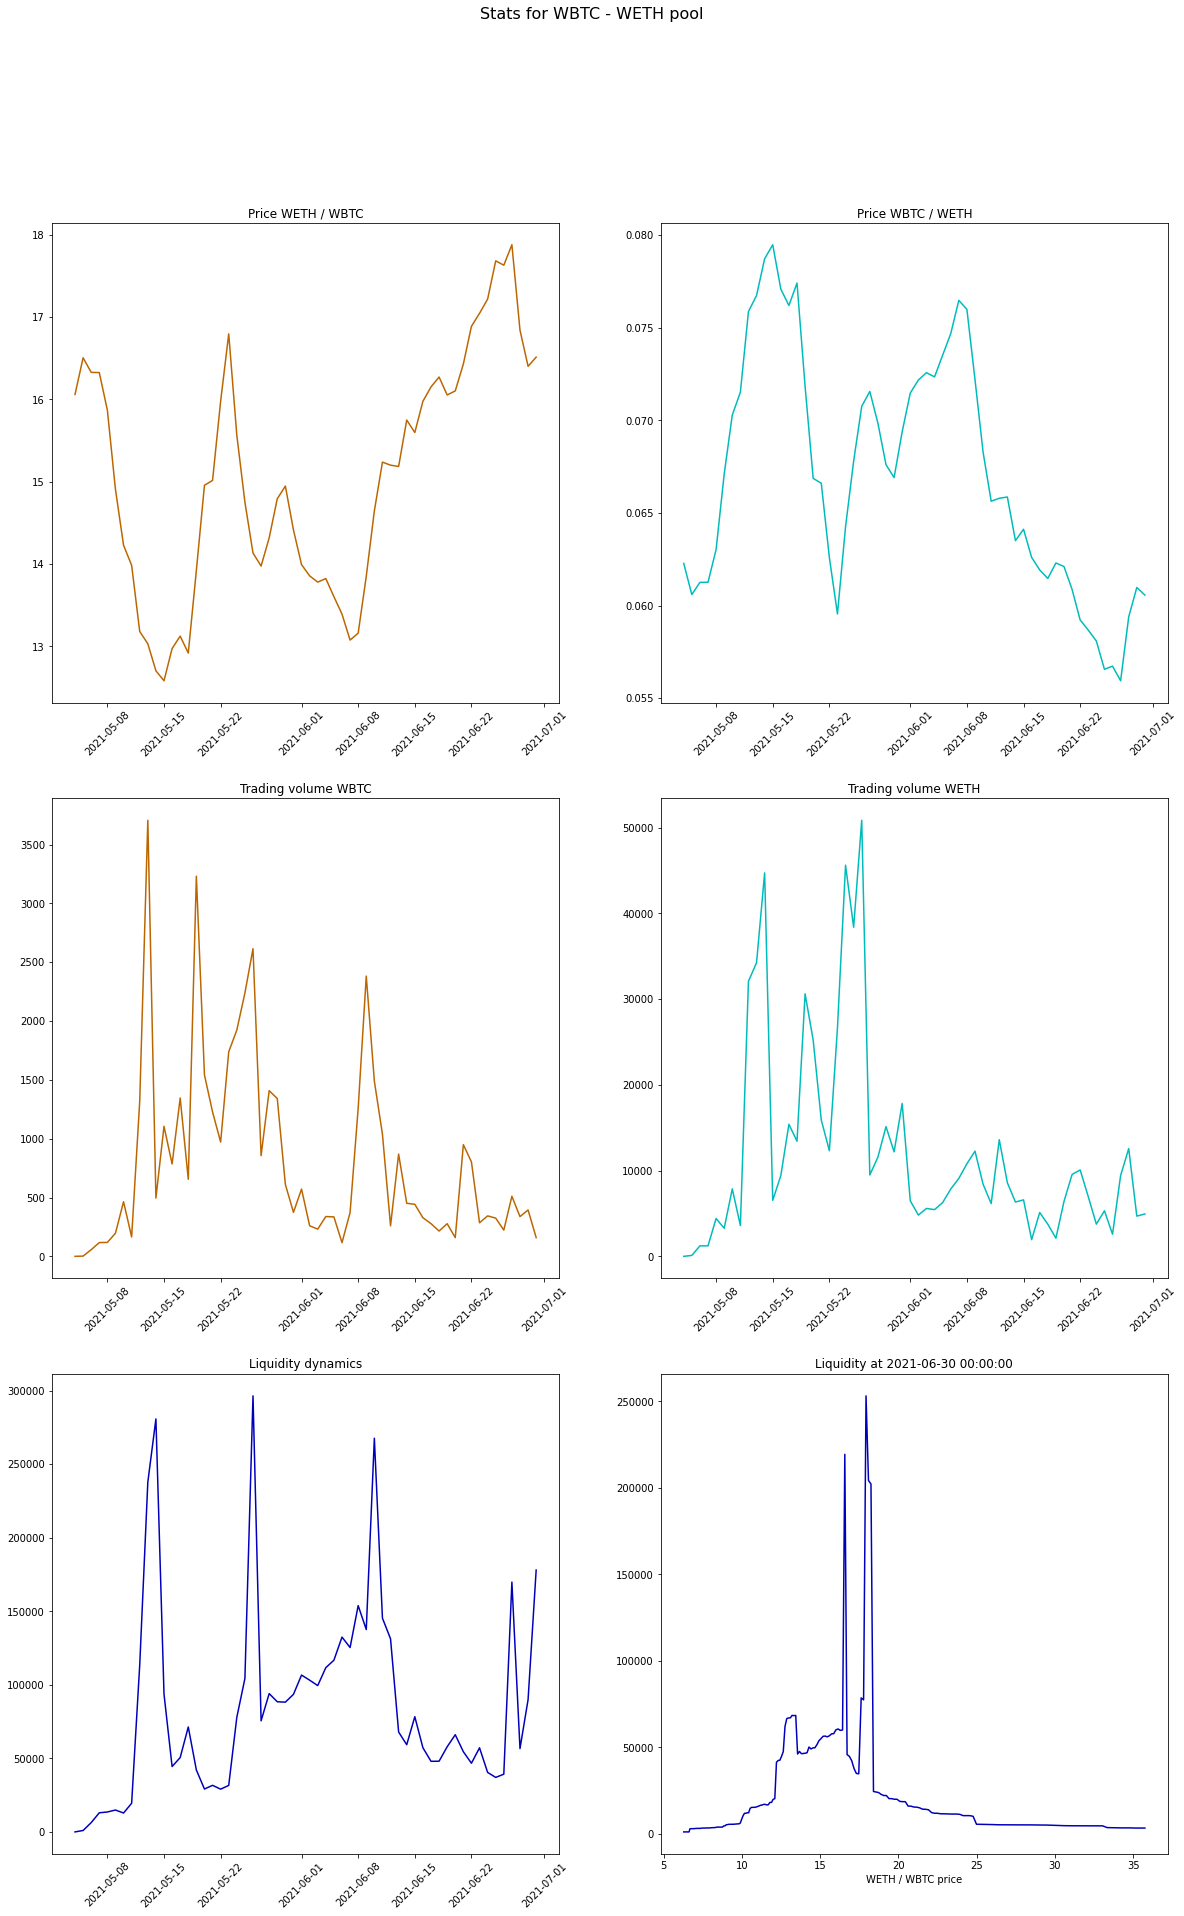

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from strategy.primitives import Pool, Frequency
from strategy.data import PoolData

p = PoolData(raw, Frequency.DAY)
p.data().tail(50)
p.plot()


In [ ]:
from strategy.portfolio import AbstractStrategy, Position
from strategy.backtest import Backtest
from datetime import datetime
from decimal import Decimal

class RebalanceStrategy(AbstractStrategy):        
    def rebalance(
        self, t: datetime, prices: pd.Series, fees0: pd.Series, fees1: pd.Series
    ):
        c = prices[t]
        if not self.portfolio().position("main"):
            self.portfolio().add_position(Position(id="main", a = c / Decimal(1.0001), b = c * Decimal(1.0001)))
            pos = self.portfolio().position("main")
            print(c, 1)
            pos.deposit(c, 1)
        else:
            pos = self.portfolio().position("main")
            pos.set_a(c / Decimal(1.0001), c)
            pos.set_b(c * Decimal(1.0001), c)
        
backtest = Backtest(RebalanceStrategy())
backtest.run(p)
backtest.plot(20, 50)

16.058620475834150198579663992859423160552978515625 1
